In [2]:
import pandas as pd

# 데이터 예시
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Age': [25, 30, None, 35, 28],
    'Gender': ['Male', 'Female', 'Female', 'Male', None],
    'Satisfaction': [5, 4, 3, None, 2],
    'PurchaseAmount': [100, 200, None, 150, 0]
}

df = pd.DataFrame(data)


In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
df

,CustomerID,Age,Gender,Satisfaction,PurchaseAmount
0,1,25.0,Male,5.0,100.0
1,2,30.0,Female,4.0,200.0
2,3,NaN,Female,3.0,NaN
3,4,35.0,Male,NaN,150.0
4,5,28.0,None,2.0,0.0


In [6]:
# 결측치 처리
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['PurchaseAmount'].fillna(0, inplace=True)
# print(df)
# 데이터 요약
print(df.describe())

       CustomerID        Age  Satisfaction  PurchaseAmount
count    5.000000   5.000000      4.000000        5.000000
mean     3.000000  29.500000      3.500000       90.000000
std      1.581139   3.640055      1.290994       89.442719
min      1.000000  25.000000      2.000000        0.000000
25%      2.000000  28.000000      2.750000        0.000000
50%      3.000000  29.500000      3.500000      100.000000
75%      4.000000  30.000000      4.250000      150.000000
max      5.000000  35.000000      5.000000      200.000000


C:\Users\LG\AppData\Local\Temp\ipykernel_21568\3926493864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\LG\AppData\Local\Temp\ipykernel_21568\3926493864.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [ ]:
# Gender는 숫자로 변환 (Label Encoding)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# 특성과 타겟 분리
X = df[['Age', 'Gender', 'PurchaseAmount']] # 입력 데이터
y = df['Satisfaction'] # 출력 데이터

print(X)
print(y)

    Age  Gender  PurchaseAmount
0  25.0     0.0           100.0
1  30.0     1.0           200.0
2  29.5     1.0             0.0
3  35.0     0.0           150.0
4  28.0     NaN             0.0
0    5.0
1    4.0
2    3.0
3    NaN
4    2.0
Name: Satisfaction, dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

In [12]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)


    Age  Gender  PurchaseAmount
4  28.0     NaN             0.0
2  29.5     1.0             0.0
0  25.0     0.0           100.0
3  35.0     0.0           150.0
4    2.0
2    3.0
0    5.0
3    NaN
Name: Satisfaction, dtype: float64
    Age  Gender  PurchaseAmount
1  30.0     1.0           200.0
1    4.0
Name: Satisfaction, dtype: float64


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. 데이터 준비
X = np.array([1,2,3,4,5]).reshape(-1, 1)  # 학습데이터: 공부 시간 (2D 로 변환)
y = np.array([50,55,65,70,75]) # 라벨: 결과 - 시험점수

In [3]:
# 2. 모델 학습 : 모델 객체 생성 -> 학습
model = LinearRegression() # 선형회귀 모델 생성
# 훈련
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [4]:
# 3. 학습 결과 지표 : 기울기, 절편
m = model.coef_[0] # 기울기
b = model.intercept_ # 절편
print('학습된 기울기 : ' , m)
print('학습된 절편 : ', b)

학습된 기울기 :  6.500000000000001
학습된 절편 :  43.5


In [7]:
# 4. 학습된 모델로 값 예측 : predict
y_pred = model.predict(X)
# [50,    55,    65,    70,   75]
print(y_pred)

[50.  56.5 63.  69.5 76. ]


In [11]:
# 5. 성능
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('mse:', mse)
print('rmse:', rmse)
print('mae:', mae)
print('r2 :', r2)

mse: 1.5
rmse: 1.224744871391589
mae: 1.0
r2 : 0.9825581395348837


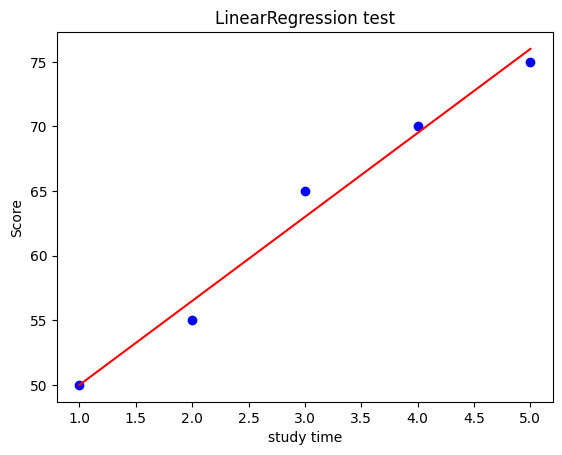

In [12]:
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X, y_pred, color='red', label='Pridiced data')
plt.xlabel('study time')
plt.ylabel('Score')
plt.title('LinearRegression test')
plt.show()

In [13]:
# 6시간 => 예측
new_hour = np.array([3, 6]).reshape(-1, 1)
pridict_score = model.predict(new_hour)
print(pridict_score)

[63.  82.5]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# 1. 데이터 셋 로드
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# 데이터셋: 특성, 타깃
X = df.drop(columns=['math score']) # 학습용 입력 데이터
y = df['math score']                # 타깃: 답

In [ ]:
# 범주형 데이터 -> 숫치 데이터 
ctgy_data = ['gender', 
             'race/ethnicity', 
             'parental level of education', 
             'lunch', 
             'test preparation course']


In [5]:
# 전처리
preprocessor = ColumnTransformer(
    transformers=[
        ('cool', OneHotEncoder(handle_unknown='ignore'), ctgy_data)
    ],
    remainder='passthrough'
)

In [6]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [7]:
# 데이터를 8:2 로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [8]:
# 학습
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cool', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
# 예측
y_pred = model.predict(X_test)

In [10]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print('mse:', mse)
print('r2:',r2)

mse: 29.095169866715516
r2: 0.8804332983749564


In [12]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split # 학습용/테스트용 데이터 분리
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # 평가 지표

In [ ]:
# 1. 데이터 셋 준비
data = load_breast_cancer() # 유방암 판별 데이터셋 로드

In [ ]:
# 특성과 타깃으로 분류
X = data.data       # 특성 데이터(다양한 세포 정보)
y = data.target     # 레이블 (0: 음성, 1: 양성)

In [ ]:
#print(X)
print(y)

In [17]:
# 훈련 데이터와 테스트 데이터 구분
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [18]:
# 학습 모델 선택, 객체 생성, 학습
model = LogisticRegression(max_iter=10000)

In [19]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [20]:
# 테스트 데이터로 예측 
y_pred = model.predict(X_test)

In [21]:
# 평가 지표
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [22]:
# 평가 지표 출력
print('정확도:', acc)
print('정밀도:', prec)
print('재현율:', recall)
print('f1 점수:', f1)

정확도: 0.956140350877193
정밀도: 0.9459459459459459
재현율: 0.9859154929577465
f1 점수: 0.9655172413793104


In [23]:
print('혼동행렬 메트릭스 출력')
print(confusion_matrix(y_test, y_pred))

혼동행렬 메트릭스 출력
[[39  4]
 [ 1 70]]


In [ ]:
# 분류 보고서 출력
print('분류 보고서 출력')
classification_report(y_test, y_pred)